In [1]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

%matplotlib inline

In [3]:
df = pd.read_csv('attrition.csv')
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,Life_SC,2,Female,94,3,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,RandD,8,Life_SC,3,Male,61,2,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,RandD,2,Other,4,Male,92,2,...,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,RandD,3,Life_SC,4,Female,56,3,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,RandD,2,Medical,1,Male,40,3,...,4,1,6,3,3,2,2,2,2,0


In [4]:
df.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64

In [5]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 29 columns):
Age                         2940 non-null int64
BusinessTravel              2940 non-null object
DailyRate                   2940 non-null int64
Department                  2940 non-null object
DistanceFromHome            2940 non-null int64
EducationField              2940 non-null object
EnvironmentSatisfaction     2940 non-null int64
Gender                      2940 non-null object
HourlyRate                  2940 non-null int64
JobInvolvement              2940 non-null int64
JobLevel                    2940 non-null int64
JobRole                     2940 non-null object
JobSatisfaction             2940 non-null int64
MaritalStatus               2940 non-null object
MonthlyIncome               2940 non-null int64
NumCompaniesWorked          2940 non-null int64
OverTime                    2940 non-null object
PercentSalaryHike           2940 non-null int64
PerformanceRating     

In [8]:
print('Gender: ', df.Gender.unique() )
print('BusinessTravel: ', df.BusinessTravel.unique() )
print('Department: ', df.Department.unique() )
print('EducationField: ', df.EducationField.unique() )
print('JobRole: ', df.JobRole.unique() )
print('MaritalStatus: ', df.MaritalStatus.unique() )
print('OverTime: ', df.OverTime.unique() )

Gender:  ['Female' 'Male']
BusinessTravel:  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department:  ['Sales' 'RandD' 'HR']
EducationField:  ['Life_SC' 'Other' 'Medical' 'Marketing' 'TECH' 'EDU_HR']
JobRole:  ['Sales_exec' 'Scientist' 'Lab_tech' 'mfg_director' 'health_rep' 'Manager'
 'Sales_rep' 'Research_dir' 'Job_HR']
MaritalStatus:  ['Single' 'Married' 'Divorced']
OverTime:  ['Yes' 'No']


In [9]:
df.groupby('Attrition').mean()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,2.645580,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,750.362869,10.632911,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,2.940928,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


# Replacement

In [10]:
df['Gender'].replace(['Female','Male'], [0 , 1], inplace = True)
df['BusinessTravel'].replace(['Travel_Rarely','Travel_Frequently','Non-Travel'], [0 , 1 , 2], inplace = True)
df['Department'].replace(['Sales' , 'RandD', 'HR'], [0 , 1 , 2], inplace = True)
df['EducationField'].replace(['Life_SC','Other','Medical','Marketing','TECH','EDU_HR'], [0,1,2,3,4,5], inplace = True)
df['JobRole'].replace(['Sales_exec','Scientist','Lab_tech','mfg_director','health_rep','Manager',
 'Sales_rep','Research_dir','Job_HR'], [0,1,2,3,4,5,6,7,8], inplace = True)
df['MaritalStatus'].replace(['Single','Married','Divorced'], [0,1,2], inplace = True)
df['OverTime'].replace(['Yes','No'], [0 , 1], inplace = True)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,0,1102,0,1,0,2,0,94,3,...,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,0,3,1,61,2,...,4,1,10,3,3,10,7,1,7,0
2,37,0,1373,1,2,1,4,1,92,2,...,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,0,4,0,56,3,...,3,0,8,3,3,8,7,3,0,0
4,27,0,591,1,2,2,1,1,40,3,...,4,1,6,3,3,2,2,2,2,0


# Reduntant Column Removal

Here, we are not able to visualize clearly. So, we are going for different apporach of finding correlation

In [13]:
## code for getting larger figure of correlation
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
corr=df.corr()
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1,-0.025,0.011,0.032,-0.0017,-0.0072,0.01,-0.036,0.024,0.03,0.51,0.16,-0.0049,0.095,0.5,0.3,-0.028,0.0036,0.0019,0.054,0.038,0.68,-0.02,-0.021,0.31,0.21,0.22,0.2,-0.16
BusinessTravel,-0.025,1,0.0041,-0.009,0.024,-0.018,-0.0042,0.033,-0.027,-0.039,-0.019,-0.029,0.034,0.024,-0.034,-0.021,0.017,0.029,0.026,0.036,0.017,-0.034,-0.015,0.011,0.015,0.011,0.033,0.023,-7.4e-05
DailyRate,0.011,0.0041,1,-0.0071,-0.005,-0.016,0.018,-0.012,0.023,0.046,0.003,-0.0025,0.031,0.07,0.0077,0.038,-0.0091,0.023,0.00047,0.0078,0.042,0.015,0.0025,-0.038,-0.034,0.0099,-0.033,-0.026,-0.057
Department,0.032,-0.009,-0.0071,1,-0.017,-0.057,0.019,0.042,0.0041,0.025,-0.1,0.43,-0.021,0.056,-0.053,0.036,0.0075,0.0078,0.025,0.022,0.012,0.016,-0.037,-0.026,-0.023,-0.056,-0.04,-0.034,-0.064
DistanceFromHome,-0.0017,0.024,-0.005,-0.017,1,0.02,-0.016,-0.0019,0.031,0.0088,0.0053,-0.044,-0.0037,0.014,-0.017,-0.029,-0.026,0.04,0.027,0.0066,0.045,0.0046,-0.037,-0.027,0.0095,0.019,0.01,0.014,0.078
EducationField,-0.0072,-0.018,-0.016,-0.057,0.02,1,0.016,-0.0039,-0.024,-0.0056,0.0097,0.045,-0.055,0.018,0.0082,0.0054,-0.0027,-0.038,-0.027,0.023,0.02,-0.0023,0.015,0.034,0.0031,-0.0077,0.0043,-0.0018,0.075
EnvironmentSatisfaction,0.01,-0.0042,0.018,0.019,-0.016,0.016,1,0.00051,-0.05,-0.0083,0.0012,-0.01,-0.0068,0.0036,-0.0063,0.013,-0.07,-0.032,-0.03,0.0077,0.0034,-0.0027,-0.019,0.028,0.0015,0.018,0.016,-0.005,-0.1
Gender,-0.036,0.033,-0.012,0.042,-0.0019,-0.0039,0.00051,1,-0.00048,0.018,-0.039,-0.015,0.033,0.047,-0.032,-0.039,0.042,0.0027,-0.014,0.023,0.013,-0.047,-0.039,-0.0028,-0.03,-0.041,-0.027,-0.031,0.029
HourlyRate,0.024,-0.027,0.023,0.0041,0.031,-0.024,-0.05,-0.00048,1,0.043,-0.028,-0.021,-0.071,0.018,-0.016,0.022,0.0078,-0.0091,-0.0022,0.0013,0.05,-0.0023,-0.0085,-0.0046,-0.02,-0.024,-0.027,-0.02,-0.0068
JobInvolvement,0.03,-0.039,0.046,0.025,0.0088,-0.0056,-0.0083,0.018,0.043,1,-0.013,-0.0068,-0.021,0.038,-0.015,0.015,0.0035,-0.017,-0.029,0.034,0.022,-0.0055,-0.015,-0.015,-0.021,0.0087,-0.024,0.026,-0.13


While comparing we didnot get any of the correlation > 0.90. So, it is better to keep all columns. As because none of the columns is in high relation with Attrition so chances of bring collinearity is minimum.
Here, we can find certain correlation among the variable as :

    Age                vs    TotalWorkingYears          AS   68%                                                                   JobLevel           vs    MonthlyIncome              As   95%
    JobLevel           vs    TotalWorkingYears          As   78%
    MaritalStatus      vs    StockObtainLevel           As   66%
    MonthlyIncome      vs    TotalWorkingYears          As   77%
    PercentSalaryHike  vs    PerformanceRating          As   77%
    YearsAtCompany     vs    YearsInCurrentRole         As   76%
    YearsAtCompany     vs    YearsSinceLastPromotion    As   62%
    YearsAtCompany     vs    YearsWithCurrManager       As   77%
   

We are considering approx 80 percent correlation as good correlation.
So, we are left with:

    JobLevel           vs    MonthlyIncome              As   95%


So we can drop JobLevel, MonthlyIncome , PercentSalaryHike , YearsAtCompany.

# Dropping columns

In [14]:
df = df.drop(['JobLevel'], axis=1)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,0,1102,0,1,0,2,0,94,3,...,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,0,3,1,61,2,...,4,1,10,3,3,10,7,1,7,0
2,37,0,1373,1,2,1,4,1,92,2,...,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,0,4,0,56,3,...,3,0,8,3,3,8,7,3,0,0
4,27,0,591,1,2,2,1,1,40,3,...,4,1,6,3,3,2,2,2,2,0


# Conversion to categories

In [15]:
df['Attrition'] = df['Attrition'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 28 columns):
Age                         2940 non-null int64
BusinessTravel              2940 non-null int64
DailyRate                   2940 non-null int64
Department                  2940 non-null int64
DistanceFromHome            2940 non-null int64
EducationField              2940 non-null int64
EnvironmentSatisfaction     2940 non-null int64
Gender                      2940 non-null int64
HourlyRate                  2940 non-null int64
JobInvolvement              2940 non-null int64
JobRole                     2940 non-null int64
JobSatisfaction             2940 non-null int64
MaritalStatus               2940 non-null int64
MonthlyIncome               2940 non-null int64
NumCompaniesWorked          2940 non-null int64
OverTime                    2940 non-null int64
PercentSalaryHike           2940 non-null int64
PerformanceRating           2940 non-null int64
RelationshipSatisfaction    2

In [16]:
df['Gender'] = df['Gender'].astype('category')
df['EducationField'] = df['EducationField'].astype('category')
df['JobRole'] = df['JobRole'].astype('category')
df['Department'] = df['Department'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')
# df['OverTime'] = df['OverTime'].astype('category')
df['BusinessTravel'] = df['BusinessTravel'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 28 columns):
Age                         2940 non-null int64
BusinessTravel              2940 non-null category
DailyRate                   2940 non-null int64
Department                  2940 non-null category
DistanceFromHome            2940 non-null int64
EducationField              2940 non-null category
EnvironmentSatisfaction     2940 non-null int64
Gender                      2940 non-null category
HourlyRate                  2940 non-null int64
JobInvolvement              2940 non-null int64
JobRole                     2940 non-null category
JobSatisfaction             2940 non-null int64
MaritalStatus               2940 non-null category
MonthlyIncome               2940 non-null int64
NumCompaniesWorked          2940 non-null int64
OverTime                    2940 non-null int64
PercentSalaryHike           2940 non-null int64
PerformanceRating           2940 non-null int64
Relationshi

In [17]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

# EDA

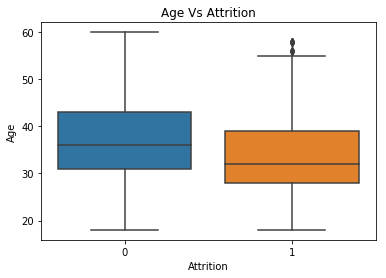

In [18]:
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age Vs Attrition')
plt.show()

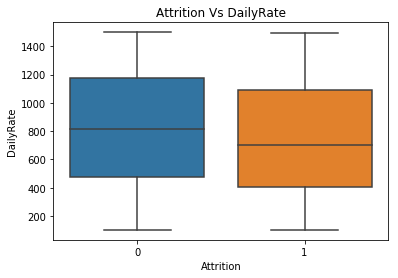

In [19]:
sns.boxplot(x='Attrition', y='DailyRate', data=df)
plt.title('Attrition Vs DailyRate')
plt.show()

In [21]:
round(pd.crosstab(df.Attrition , df.BusinessTravel,  normalize = 'columns'),2)


BusinessTravel,0,1,2
Attrition,,,
0,0.85,0.75,0.92
1,0.15,0.25,0.08


                                             0 - Travel-Rarely
                                             1 - Travel-Frequently
                                             2 - Non-Travel

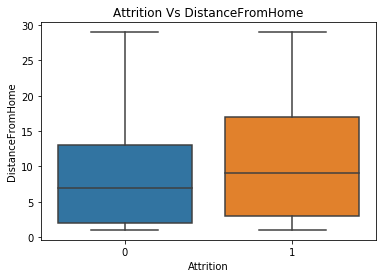

In [22]:
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)
plt.title('Attrition Vs DistanceFromHome')
plt.show()

In [23]:
ACC_perct = round(pd.crosstab(df.Attrition , df.JobRole,  normalize = 'columns'),2)
print(ACC_perct)

JobRole       0     1     2     3     4     5    6     7     8
Attrition                                                     
0          0.83  0.84  0.76  0.93  0.93  0.95  0.6  0.98  0.77
1          0.17  0.16  0.24  0.07  0.07  0.05  0.4  0.02  0.23


    0 - 'Sales_exec'
    1 - 'Scientist'
    2 - 'Lab_tech'
    3 - 'mfg_director'
    4 - 'health_rep'
    5 - 'Manager'
    6 - 'Sales_rep'
    7 - 'Research_dir'
    8 - 'Job_HR'

In [24]:
ACC_perct = round(pd.crosstab(df.Attrition , df.MaritalStatus,  normalize = 'columns'),2)
print(ACC_perct)

MaritalStatus     0     1    2
Attrition                     
0              0.74  0.88  0.9
1              0.26  0.12  0.1


    0- 'Single'
    1- 'Married'
    2- 'Divorced'

In [25]:
ACC_perct = round(pd.crosstab(df.Attrition , df.OverTime,  normalize = 'columns'),2)
print(ACC_perct)

OverTime      0    1
Attrition           
0          0.69  0.9
1          0.31  0.1


                                0 - 'Yes'
                                1 - 'No'

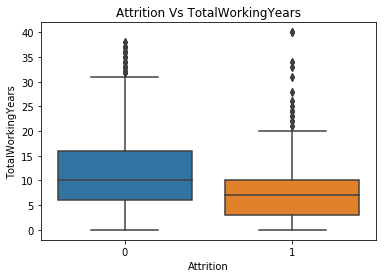

In [27]:
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df)
plt.title('Attrition Vs TotalWorkingYears')
plt.show()

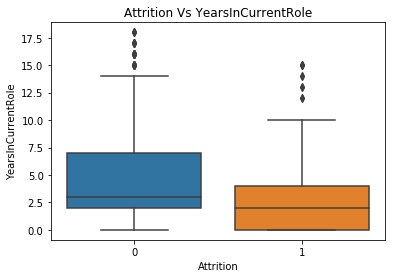

In [28]:
sns.boxplot(x='Attrition', y='YearsInCurrentRole', data=df)
plt.title('Attrition Vs YearsInCurrentRole')
plt.show()

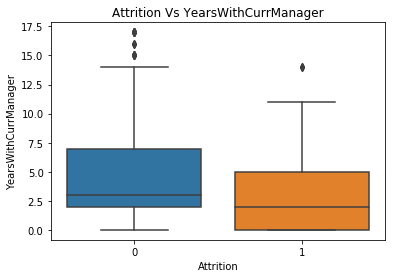

In [29]:
sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=df)
plt.title('Attrition Vs YearsWithCurrManager')
plt.show()

# Decision Tree

# Spilitting of dataset

In [30]:
#Create dataframes for X and Y variables
x = df.drop(["Attrition"], axis=1)
y = df[['Attrition']]
print(x.shape)
print(y.shape)

(2940, 27)
(2940, 1)


In [31]:
##Convert x to dummy variables
x=pd.get_dummies(x , drop_first = True)

In [32]:
x.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_1', 'BusinessTravel_2',
       'Department_1', 'Department_2', 'EducationField_1', 'EducationField_2',
       'EducationField_3', 'EducationField_4', 'EducationField_5', 'Gender_1',
       'JobRole_1', 'JobRole_2', 'JobRole_3', 'JobRole_4', 'JobRole_5',
       'JobRole_6', 'JobRole_7', 'JobRole_8', 'MaritalStatus_1',
       'MaritalStatus_2'],
      dtype='object')

In [33]:
##Train test split
from sklearn.model_selection import train_test_split
seed = 7
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 123)

In [34]:
X_train.shape,X_test.shape

((2058, 41), (882, 41))

In [35]:
y_train

,Attrition
1906,1
2560,0
2186,0
2123,0
1663,0
452,0
585,1
1732,0
2460,0
2538,1


# Model1:- Criterion1='gini'

In [36]:
model_gini=DecisionTreeClassifier()
model_gini.fit(X_train, y_train)
preds_gini = model_gini.predict(X_test)

In [37]:
model_gini_train=DecisionTreeClassifier()
model_gini_train.fit(X_train, y_train)
preds_gini_train= model_gini.predict(X_train)

# Evaluation Metrics

In [38]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,preds_gini)

print("confusion matrix = \n",mat_gini)

confusion matrix = 
 [[714  38]
 [ 30 100]]


In [39]:
#Calculate accuracy
print(accuracy_score(y_test,preds_gini))
print(accuracy_score(y_train,preds_gini_train))

0.9229024943310657
1.0


In [40]:
print(metrics.classification_report(y_test,preds_gini))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       752
           1       0.72      0.77      0.75       130

   micro avg       0.92      0.92      0.92       882
   macro avg       0.84      0.86      0.85       882
weighted avg       0.93      0.92      0.92       882



# Model1:- Criterion2='entropy'

In [41]:
model_entropy=DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
preds_entropy = model_entropy.predict(X_test)
preds_entropy_train = model_entropy.predict(X_train)
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,preds_entropy)

print("confusion matrix = \n",mat_gini)

confusion matrix = 
 [[718  34]
 [ 32  98]]


# Evaluation Metrics

In [43]:
print(accuracy_score(y_test,preds_entropy))
print(accuracy_score(y_train,preds_entropy_train))

0.9251700680272109
1.0


#### It is an overfit model as because the acc of train > acc of test

In [44]:
print(metrics.classification_report(y_test,preds_entropy))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       752
           1       0.74      0.75      0.75       130

   micro avg       0.93      0.93      0.93       882
   macro avg       0.85      0.85      0.85       882
weighted avg       0.93      0.93      0.93       882



In [45]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_entropy = confusion_matrix(y_test,preds_entropy)

print("confusion matrix = \n",mat_entropy)

confusion matrix = 
 [[718  34]
 [ 32  98]]


## Visualizing the tree

In [46]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

feature_cols = x.columns

### Tree from entropy

In [47]:
dot_data = StringIO()
export_graphviz(model_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('delay_gini.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

#### The tree is overgrown due to which there is overfitting - we will now prune the tree and re-evaluate the model

## Pruning

In [48]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [49]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('delay_pruned.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [50]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [51]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_pruned = confusion_matrix(y_test,preds_pruned)

print("confusion matrix = \n",mat_pruned)

confusion matrix = 
 [[708  44]
 [ 79  51]]


In [52]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.8605442176870748
0.8858114674441205


In [53]:
print(metrics.classification_report(y_test,preds_pruned))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       752
           1       0.54      0.39      0.45       130

   micro avg       0.86      0.86      0.86       882
   macro avg       0.72      0.67      0.69       882
weighted avg       0.85      0.86      0.85       882



## Calculating feature importance

In [54]:
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))

feat importance = [0.00222954 0.00375782 0.00454703 0.00478376 0.00478077 0.00311237
 0.00318692 0.01630247 0.         0.01589519 0.         0.
 0.         0.00548513 0.01860808 0.         0.00156206 0.
 0.00376947 0.         0.00326238 0.         0.00238191 0.0047448
 0.         0.         0.00060131 0.         0.00105418 0.
 0.         0.00194363 0.         0.         0.         0.
 0.00060498 0.         0.         0.         0.        ]


In [55]:
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False).head(12)

,0
TotalWorkingYears,0.181341
MonthlyIncome,0.158872
OverTime,0.154903
StockOptionLevel,0.053454
EnvironmentSatisfaction,0.046619
HourlyRate,0.046590
Department_1,0.046239
DistanceFromHome,0.044312
YearsInCurrentRole,0.036735
DailyRate,0.036621


In [56]:
# print the first 10 predicted probabilities of class membership
clf_pruned.predict_proba(X_test)[0:10]


array([[0.28571429, 0.71428571],
       [0.93782383, 0.06217617],
       [0.94635193, 0.05364807],
       [0.94635193, 0.05364807],
       [0.94635193, 0.05364807],
       [0.94635193, 0.05364807],
       [0.94635193, 0.05364807],
       [0.7826087 , 0.2173913 ],
       [0.94635193, 0.05364807],
       [0.90625   , 0.09375   ]])

In [57]:
# store the predicted probabilities for class 1
y_pred_prob = clf_pruned.predict_proba(X_test)[:, 1]
y_pred_prob[1:20]

array([0.06217617, 0.05364807, 0.05364807, 0.05364807, 0.05364807,
       0.05364807, 0.2173913 , 0.05364807, 0.09375   , 0.09375   ,
       0.06217617, 0.06217617, 0.20183486, 0.05364807, 0.05364807,
       0.42307692, 0.77777778, 0.2173913 , 0.09375   ])

Text(0, 0.5, 'Frequency')

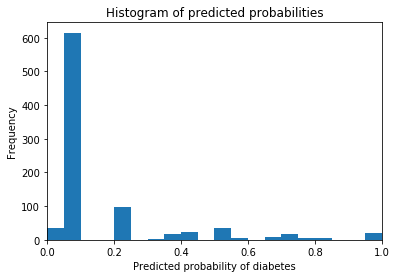

In [58]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=20)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [59]:
## Changing the cut off value for prediction
pred_proba_df = pd.DataFrame(clf_pruned.predict_proba(X_test))
threshold_list = [0.01,0.02,0.03,0.04,0.05,0.1,0.15,0.17,0.19,0.2,0.25,0.3,0.35,0.38,0.4,0.41,0.42,0.43,0.45,.5,0.6,.7,.8,.9,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x:1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {:.2f}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.01 ******
Our testing accuracy is 0.16
[[ 12 740]
 [  0 130]]

******** For i = 0.02 ******
Our testing accuracy is 0.16
[[ 12 740]
 [  0 130]]

******** For i = 0.03 ******
Our testing accuracy is 0.16
[[ 12 740]
 [  0 130]]

******** For i = 0.04 ******
Our testing accuracy is 0.16
[[ 12 740]
 [  0 130]]

******** For i = 0.05 ******
Our testing accuracy is 0.18
[[ 31 721]
 [  4 126]]

******** For i = 0.1 ******
Our testing accuracy is 0.78
[[603 149]
 [ 47  83]]

******** For i = 0.15 ******
Our testing accuracy is 0.78
[[603 149]
 [ 47  83]]

******** For i = 0.17 ******
Our testing accuracy is 0.78
[[603 149]
 [ 47  83]]

******** For i = 0.19 ******
Our testing accuracy is 0.78
[[603 149]
 [ 47  83]]

******** For i = 0.2 ******
Our testing accuracy is 0.79
[[615 137]
 [ 49  81]]

******** For i = 0.25 ******
Our testing accuracy is 0.83
[[676  76]
 [ 71  59]]

******** For i = 0.3 ******
Our testing accuracy is 0.83
[[676  76]
 [ 71  59]]

******** For i = 0

In [60]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [62]:
clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 4, 5,6,7,8],
    }

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [63]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [64]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'max_depth': 8}

Confusion matrix of optimized for recall_score on the test data:
     pred_neg  pred_pos
neg       709        43
pos        52        78


C:\Users\vharsheny\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [67]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_max_depth']].round(3)

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth
4,0.752,0.465,0.882,7
5,0.725,0.578,0.891,8
3,0.724,0.436,0.877,6
1,0.708,0.259,0.854,4
0,0.667,0.250,0.849,3
2,0.665,0.340,0.859,5


In [68]:
y_scores = grid_search_clf.predict_proba(X_test)[:, 1]
# for classifiers with decision_function, this achieves similar results
# y_scores = classifier.decision_function(X_test)

In [69]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [70]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    
   

In [71]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

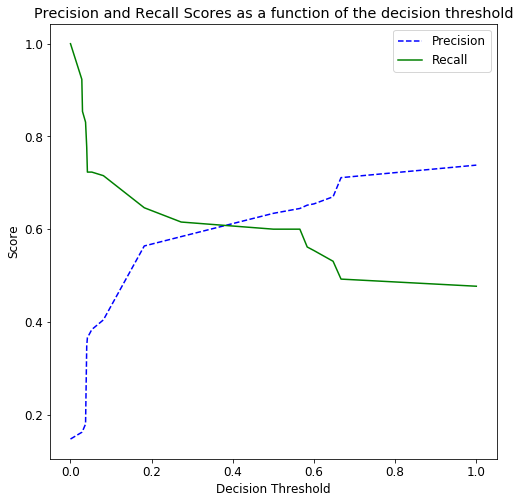

In [72]:
# use the same p, r, thresholds that were previously calculated
plot_precision_recall_vs_threshold(p, r, thresholds)

## Model building with threshold value 0.19

In [73]:
clf_pruned_final = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=8, min_samples_leaf=5)
clf_pruned_final.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [74]:
dot_data = StringIO()
export_graphviz(clf_pruned_final, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('delay_pruned.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [75]:
preds_pruned_final = clf_pruned_final.predict(X_test)
preds_pruned_train1 = clf_pruned_final.predict(X_train)

In [76]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_pruned_final = confusion_matrix(y_test,preds_pruned_final)

print("confusion matrix = \n",mat_pruned_final)

confusion matrix = 
 [[701  51]
 [ 62  68]]


In [77]:
## Changing the cut off value for prediction
pred_proba = pd.DataFrame(clf_pruned_final.predict_proba(X_test))
threshold_list = [0.19]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba.applymap(lambda x:1 if x>i else 0)
    test_accurac = metrics.accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {:.2f}'.format(test_accurac))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.19 ******
Our testing accuracy is 0.85
[[666  86]
 [ 42  88]]


In [78]:
print(accuracy_score(y_test,preds_pruned_final))
print(accuracy_score(y_train,preds_pruned_train1))

0.8718820861678005
0.9373177842565598


In [79]:
print(metrics.classification_report(y_test,preds_pruned))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       752
           1       0.54      0.39      0.45       130

   micro avg       0.86      0.86      0.86       882
   macro avg       0.72      0.67      0.69       882
weighted avg       0.85      0.86      0.85       882



## Calculating feature importance

In [80]:
feat_importance1 = clf_pruned.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance1))

feat importance = [0.00222954 0.00375782 0.00454703 0.00478376 0.00478077 0.00311237
 0.00318692 0.01630247 0.         0.01589519 0.         0.
 0.         0.00548513 0.01860808 0.         0.00156206 0.
 0.00376947 0.         0.00326238 0.         0.00238191 0.0047448
 0.         0.         0.00060131 0.         0.00105418 0.
 0.         0.00194363 0.         0.         0.         0.
 0.00060498 0.         0.         0.         0.        ]


#### Features affecting employees staying.

In [81]:
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False).head(10)

,0
TotalWorkingYears,0.181341
MonthlyIncome,0.158872
OverTime,0.154903
StockOptionLevel,0.053454
EnvironmentSatisfaction,0.046619
HourlyRate,0.046590
Department_1,0.046239
DistanceFromHome,0.044312
YearsInCurrentRole,0.036735
DailyRate,0.036621


In [82]:
y_pred_proba = clf_pruned_final.predict_proba(x)[:, 1]
y_pred_proba[0:20]

array([0.6       , 0.09090909, 0.66666667, 0.8       , 0.03030303,
       0.09090909, 0.01818182, 0.        , 0.09090909, 0.03409091,
       0.03030303, 0.        , 0.03030303, 0.03409091, 1.        ,
       0.01859504, 0.01818182, 0.57142857, 0.03030303, 0.        ])

#### Adding probabilities of Attrition to the dataframe

In [84]:
w=pd.Series(y_pred_proba)
df['y_pred_proba']=w
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,y_pred_proba
0,41,0,1102,0,1,0,2,0,94,3,...,0,8,0,1,6,4,0,5,1,0.600000
1,49,1,279,1,8,0,3,1,61,2,...,1,10,3,3,10,7,1,7,0,0.090909
2,37,0,1373,1,2,1,4,1,92,2,...,0,7,3,3,0,0,0,0,1,0.666667
3,33,1,1392,1,3,0,4,0,56,3,...,0,8,3,3,8,7,3,0,0,0.800000
4,27,0,591,1,2,2,1,1,40,3,...,1,6,3,3,2,2,2,2,0,0.030303
